In [207]:
import pandas as pd
import plotly 
import numpy as np
import plotly.figure_factory as ff
import scipy
import plotly.graph_objects as go
import dash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.offline import plot
import random

#pip install scipy
#!pip install Dash

In [208]:
# Import data

data = pd.read_csv('chocolate.csv')
continent = pd.read_csv('countryContinent.csv',encoding = "ISO-8859-1")
imp_exp=pd.read_csv('UNdata_Export_20220301_151116452.csv')
coord=pd.read_csv('country_points.csv',encoding = "ISO-8859-1")

In [209]:
coord.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [210]:
continent.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [211]:
imp_exp.head()

,Table Code,Country or Area Code,Country or Area,Year,Comm. Code,Commodity,Flow Code,Flow,Trade (USD),Weight (kg),Quantity Code,Quantity Name,Quantity
0,19,4,Afghanistan,2018,180500,"Cocoa powder, unsweetened",1,Import,7.247329e+04,8.070000e+04,8,Weight in kilograms,8.070000e+04
1,19,4,Afghanistan,2018,180690,Chocolate/cocoa food preparations nes,1,Import,3.281740e+07,5.662823e+06,8,Weight in kilograms,5.662823e+06
2,19,4,Afghanistan,2018,180690,Chocolate/cocoa food preparations nes,2,Export,4.327404e+06,0.000000e+00,8,Weight in kilograms,6.239175e+06
3,19,4,Afghanistan,2018,180690,Chocolate/cocoa food preparations nes,3,Re-Export,7.452492e+04,0.000000e+00,8,Weight in kilograms,0.000000e+00
4,19,4,Afghanistan,2016,180690,Chocolate/cocoa food preparations nes,1,Import,1.568728e+08,2.677301e+07,8,Weight in kilograms,2.677301e+07


In [212]:
imp_exp=imp_exp[imp_exp['Commodity']=='Cocoa beans, whole or broken, raw or roasted'][['Country or Area','Year','Commodity','Flow','Quantity','Trade (USD)']]
imp_exp.head()

,Country or Area,Year,Commodity,Flow,Quantity,Trade (USD)
60,Albania,2012,"Cocoa beans, whole or broken, raw or roasted",Import,130.0,874.0
71,Albania,2011,"Cocoa beans, whole or broken, raw or roasted",Import,4524.0,19877.0
83,Albania,2010,"Cocoa beans, whole or broken, raw or roasted",Import,45.0,295.0
94,Albania,2009,"Cocoa beans, whole or broken, raw or roasted",Import,262.0,1919.0
149,Albania,2004,"Cocoa beans, whole or broken, raw or roasted",Import,1606.0,2729.0


In [213]:
# Prepare the data for the merge
data["company_location"] = data["company_location"].str.title()
data["country_of_bean_origin"] = data["country_of_bean_origin"].str.title()
data["company_location"].replace({'U.S.A': 'United States of America','U.K.':'United Kingdom of Great Britain and Northern Ireland','Dominican republic':'Dominican Republic','El salvador':'El Salvador','Vietnam':'Viet Nam','Venezuela':'Venezuela (Bolivarian Republic of)','South Korea':'Korea (Republic of)','New Zealand':'New Zealand','Russia':'Russian Federation','Taiwan':'Taiwan, Province of China','Sao Tome':'Sao Tome and Principe','Sao Tome & Principe':'Sao Tome and Principe','St. Lucia':'Saint Lucia','U.A.E.':'United Arab Emirates','St.Vincent-Grenadines':'Saint Vincent and the Grenadines','Bolivia':'Bolivia (Plurinational State of)'}, inplace=True)
data["country_of_bean_origin"].replace({'U.S.A': 'United States of America','U.K.':'United Kingdom of Great Britain and Northern Ireland','Dominican republic':'Dominican Republic','El salvador':'El Salvador','Vietnam':'Viet Nam','Venezuela':'Venezuela (Bolivarian Republic of)','South Korea':'Korea (Republic of)','New Zealand':'New Zealand','Russia':'Russian Federation','Taiwan':'Taiwan, Province of China','Sao Tome':'Sao Tome and Principe','Sao Tome & Principe':'Sao Tome and Principe','St. Lucia':'Saint Lucia','U.A.E.':'United Arab Emirates','St.Vincent-Grenadines':'Saint Vincent and the Grenadines','Bolivia':'Bolivia (Plurinational State of)','Burma':'Myanmar','Tanzania':'Tanzania, United Republic of','Trinidad':'Trinidad and Tobago','Dr Congo':'Congo (Democratic Republic of the)'}, inplace=True)

In [214]:
# removing Unnamed:0
data=data.iloc[:,1:]

In [215]:
teste=data.merge(continent[['country','continent','sub_region','code_2']].rename(columns={'continent':'company_continent','sub_region':'company_region','code_2':'company_code_2'}), left_on='company_location', right_on='country', how='left')

In [216]:
teste[teste['company_continent'].isna()]['company_location'].value_counts

<bound method IndexOpsMixin.value_counts of 193        Wales
486     Scotland
487     Scotland
488     Scotland
489     Scotland
490     Scotland
491     Scotland
1083    Scotland
1084    Scotland
1513    Scotland
1514    Scotland
Name: company_location, dtype: object>

In [217]:
teste=teste[teste['company_location']!= 'Scotland']

In [218]:
teste=teste.merge(continent[['country','continent','sub_region','code_2']].rename(columns={'continent':'bean_continent','sub_region':'bean_region','code_2':'bean_code_2'}), left_on='country_of_bean_origin', right_on='country', how='left')

In [219]:
teste[teste['bean_continent'].isna()]['country_of_bean_origin'].value_counts

<bound method IndexOpsMixin.value_counts of 88      Blend
92      Blend
96      Blend
100     Blend
177     Blend
        ...  
2188    Blend
2201    Blend
2203    Blend
2209    Blend
2213    Blend
Name: country_of_bean_origin, Length: 177, dtype: object>

In [220]:
teste=teste[teste['country_of_bean_origin']!= 'Blend']

In [221]:
data=teste

In [222]:
data.columns

Index(['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste', 'country_x', 'company_continent', 'company_region',
       'company_code_2', 'country_y', 'bean_continent', 'bean_region',
       'bean_code_2'],
      dtype='object')

In [223]:
# Add the coordinates both for bean_origin and company_location
coord.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [224]:
teste1=data.merge(coord.iloc[:,:-1], left_on='bean_code_2', right_on='country', how='left').rename(columns={'latitude':'bean_lat','longitude':'bean_lon'})
teste2=data.merge(coord.iloc[:,:-1], left_on='company_code_2', right_on='country', how='left').rename(columns={'latitude':'country_lat','longitude':'country_lon'})

In [225]:
data1=data.groupby(by=['company']).mean()
data1

,ref,review_date,cocoa_percent,rating,counts_of_ingredients
company,,,,,
5150,2455.333333,2019.000000,76.000000,3.500000,3.000000
A. Morin,1294.480000,2013.960000,68.880000,3.400000,3.960000
AMMA,670.600000,2010.600000,69.000000,3.500000,4.000000
Acalli,1966.000000,2017.500000,71.000000,3.562500,2.000000
Adi aka Fijiana (Easy In Ltd),705.000000,2011.000000,75.000000,3.250000,3.000000
...,...,...,...,...,...
Zotter,1033.705882,2012.647059,70.352941,3.352941,3.823529
hello cocoa,1460.000000,2015.000000,65.500000,3.125000,3.000000
hexx,1848.000000,2016.500000,71.500000,2.925000,2.000000


In [226]:
imp_exp_regions = imp_exp.merge(continent[['country','continent','sub_region','code_2']].rename(columns={'sub_region':'region'}), left_on = 'Country or Area', right_on= 'country', how= 'left')

In [227]:
# falta meter titulo xaxis yaxis
#labels = ['1st quartile','2nd quartile','3rd quartile','4th quartile']
#variables=[var1,var2,var3,var4]
#fig = ff.create_distplot(variables,labels, show_hist=False)
#fig.show()


### Exports and Imports


### ------------- BEA


In [228]:
imp_exp_regions.loc[(imp_exp_regions['continent']=='nan') & (imp_exp_regions['Country or Area']!='nan')]

,Country or Area,Year,Commodity,Flow,Quantity,Trade (USD),country,continent,region,code_2


In [229]:
imp_exp_regions['country'].isna().sum()

648

In [230]:
imp_exp_regions['continent'].isna().sum()
#imp_exp_regions[imp_exp_regions['Quantity'].isna()==True]

648

In [231]:
imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Flow'] == 'Re-Export')]
imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Flow'] == 'Re-Import')]

In [232]:
imp_exp_regions["Quantity"]= imp_exp_regions["Quantity"].fillna(imp_exp_regions.groupby('Country or Area')['Quantity'].transform('mean'))

imp_exp_regions['Quantity'].astype(int)

0         130
1        4524
2          45
3         262
4        1606
        ...  
5053       79
5054      221
5055      934
5056    14942
5057        9
Name: Quantity, Length: 4898, dtype: int32

In [233]:
imp_exp_regions=imp_exp_regions[imp_exp_regions['Country or Area'].isnull()!= True] #removing nulls from Country or Area Column


In [234]:
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Wallis and Futuna Isds', 'continent'] = 'Oceania'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Wallis and Futuna Isds','region'] = 'Polynesia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Venezuela', 'continent'] = 'Americas'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Venezuela','region'] = 'Southern America'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'United Rep. of Tanzania', 'continent'] = 'Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'United Rep. of Tanzania','region'] = 'Eastern Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'United Rep. of Tanzania','country'] = 'Tanzania'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'United Kingdom', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'United Kingdom','region'] = 'Northern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'USA', 'continent'] = 'Americas'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'USA','region'] = 'Northern America'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'USA','country'] = 'United States of America'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Turks and Caicos Isds', 'continent'] = 'Americas'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Turks and Caicos Isds','region'] = 'Central America'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'TFYR of Macedonia', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'TFYR of Macedonia','region'] = 'Southern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'TFYR of Macedonia','country'] = 'Macedonia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Syria', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Syria','region'] = 'Western Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Solomon Isds', 'continent'] = 'Oceania'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Solomon Isds','region'] = 'Australia and New Zealand'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Serbia and Montenegro', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Serbia and Montenegro','region'] = 'Southern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Moldova', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Moldova','region'] = 'Eastern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Moldova','country'] = 'Moldova'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Korea', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Korea','region'] = 'Eastern Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Rep. of Korea','country'] = 'South Korea'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Other Asia, nes', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Other Asia, nes','region'] = 'Other'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Neth. Antilles', 'continent'] = 'Americas'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Neth. Antilles','region'] = 'Caribbean'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Lao People\'s Dem. Rep.', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Lao People\'s Dem. Rep.','region'] = 'South-Eastern Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Lao People\'s Dem. Rep.','country'] = 'Laos'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Iran', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Iran','region'] = 'South-Western Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Fed. Rep. of Germany', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Fed. Rep. of Germany','region'] = 'Central Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Fed. Rep. of Germany','country'] = 'Germany'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Faeroe Isds', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Faeroe Isds', 'region'] = 'Northern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'FS Micronesia', 'continent'] = 'Oceania'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'FS Micronesia', 'region'] = 'Micronesia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Czech Rep.', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Czech Rep.', 'region'] = 'Central Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Bosnia Herzegovina', 'continent'] = 'Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Bosnia Herzegovina', 'region'] = 'Southern Europe'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Central African Rep.', 'continent'] = 'Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Central African Rep.', 'region'] = 'Middle Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'China, Hong Kong SAR', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'China, Hong Kong SAR', 'region'] = 'Eastern Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'China, Macao SAR', 'continent'] = 'Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'China, Macao SAR', 'region'] = 'Eastern Asia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Cook Isds', 'continent'] = 'Oceania'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Cook Isds', 'region'] = 'Polynesia'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Dominican Rep.', 'continent'] = 'Americas'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Dominican Rep.', 'region'] = 'Caribbean'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Sudan', 'continent'] = 'Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Sudan','region'] = 'Northern Africa'
imp_exp_regions.loc[imp_exp_regions['Country or Area'] == 'Fmr Sudan','country'] = 'Sudan'

imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Country or Area'] == 'Belgium-Luxembourg')]

imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Country or Area'] == 'EU-28')]
imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Country or Area'] == 'So. African Customs Union')]
imp_exp_regions= imp_exp_regions[~(imp_exp_regions['Country or Area'] == 'China, Hong Kong SAR')]


In [235]:
flows_df=imp_exp_regions.drop(columns=['country', 'code_2'])

In [237]:
#convert data type and sort the data by Year
flows_df=flows_df.sort_values(by=['Year'])

In [238]:
flows_df=flows_df.dropna(how='any')

In [240]:
groupby_flows=flows_df.groupby(['Year','continent', 'region', 'Country or Area', 'Flow']).mean(['Trade (USD)','Quantity'])
groupby_flows.reset_index(inplace=True)
groupby_flows

,Year,continent,region,Country or Area,Flow,Quantity,Trade (USD)
0,1988,Americas,Caribbean,Haiti,Export,2.720937e+06,3.995150e+06
1,1988,Asia,Eastern Asia,Japan,Import,4.097251e+07,8.498128e+07
2,1988,Asia,Eastern Asia,Rep. of Korea,Import,1.978812e+06,4.450443e+06
3,1988,Europe,Central Europe,Fmr Fed. Rep. of Germany,Export,1.824422e+06,3.625000e+06
4,1988,Europe,Central Europe,Fmr Fed. Rep. of Germany,Import,2.223116e+08,4.471900e+08
...,...,...,...,...,...,...,...
4801,2019,Europe,Southern Europe,Greece,Import,3.279127e+06,8.264908e+06
4802,2019,Europe,Southern Europe,TFYR of Macedonia,Export,3.000000e+00,4.538000e+01
4803,2019,Europe,Southern Europe,TFYR of Macedonia,Import,4.660000e+02,4.885310e+03
4804,2019,Europe,Western Europe,Switzerland,Export,3.428100e+05,1.724814e+06


In [241]:
groupby_flows=groupby_flows[groupby_flows['Year']!=1988]
groupby_flows=groupby_flows[groupby_flows['Year']!=1989]
groupby_flows=groupby_flows[groupby_flows['Year']!=1990]
#delete years until all continents have value for exports and imports

flows_df=flows_df[flows_df['Year']!=1988]
flows_df=flows_df[flows_df['Year']!=1989]
flows_df=flows_df[flows_df['Year']!=1990]

In [242]:
africa_count= len(flows_df.groupby('continent')['Country or Area'].unique()[0])
americas_count= len(flows_df.groupby('continent')['Country or Area'].unique()[1])
asia_count= len(flows_df.groupby('continent')['Country or Area'].unique()[2])
europe_count= len(flows_df.groupby('continent')['Country or Area'].unique()[3])
oceania_count= len(flows_df.groupby('continent')['Country or Area'].unique()[4])

print('Africa has: ' + str(africa_count) + ' countries')
print('Americas has: ' + str(americas_count) + ' countries')
print('Asia has: ' + str(asia_count) + ' countries')
print('Europe has: ' + str(europe_count) + ' countries')
print('Oceania has: ' + str(oceania_count) + ' countries')

Africa has: 49 countries
Americas has: 43 countries
Asia has: 44 countries
Europe has: 42 countries
Oceania has: 15 countries


In [243]:
nr_countries = [['Africa', africa_count],
                ['Americas', americas_count], 
                ['Asia', asia_count],
                ['Europe', europe_count],
                ['Oceania', oceania_count]]

df_nr_countries = pd.DataFrame(nr_countries, columns = ['Continent', 'Nr of Countries'])
print(df_nr_countries)

  Continent  Nr of Countries
0    Africa               49
1  Americas               43
2      Asia               44
3    Europe               42
4   Oceania               15


In [244]:
groupby_flows= pd.merge(df_nr_countries, groupby_flows, left_on='Continent', right_on='continent')
groupby_flows.drop(columns='continent', inplace=True)
groupby_flows

,Continent,Nr of Countries,Year,region,Country or Area,Flow,Quantity,Trade (USD)
0,Africa,49,1991,Eastern Africa,Madagascar,Export,4272629.0,3.971947e+06
1,Africa,49,1991,Eastern Africa,Malawi,Import,101.0,2.920000e+02
2,Africa,49,1991,Northern Africa,Tunisia,Import,355500.0,5.718130e+05
3,Africa,49,1992,Eastern Africa,Kenya,Export,810.0,1.379000e+03
4,Africa,49,1992,Eastern Africa,Kenya,Import,342375.0,5.445820e+05
...,...,...,...,...,...,...,...,...
4717,Oceania,15,2018,Melanesia,Fiji,Export,8270.0,2.248422e+04
4718,Oceania,15,2018,Melanesia,Fiji,Import,528.0,3.499561e+03
4719,Oceania,15,2018,Micronesia,Palau,Import,4.5,5.595000e+01
4720,Oceania,15,2018,Polynesia,Samoa,Export,34976.6,2.608072e+05


In [245]:
#groupby_flows['Q_avg_pond']=groupby_flows.apply(lambda row: row['Quantity']/row['Nr of Countries'], axis=1)
#groupby_flows['T_avg_pond']=groupby_flows.apply(lambda row: row['Trade (USD)']/row['Nr of Countries'], axis=1)
#TO TEST VISUALIZATIONS WITH MEDIA PONDERADA - not used so far

In [246]:
groupby_flows = groupby_flows.sort_values('Year', ascending=True)

In [247]:
def scatter_flows(flow):
    fig = px.scatter(groupby_flows[groupby_flows['Flow']==flow],
                 x='Quantity',
                 y='Trade (USD)',
                 animation_frame='Year', 
                 animation_group='Continent', 
                 size='Nr of Countries', 
                 color='Continent',
                 hover_name='Continent',
                 )
    fig.update_layout(
                    title=('Quantity of Cacao ' + str(flow) + 'ed vs Trade (USD) by Continents in 1988 - 2019'),
                    xaxis=dict(title=('Quantity '+ str(flow) + 'ed')),
                    yaxis=dict(title=(str(flow) + ' Trade (USD) of Cacao')),
                    #paper_bgcolor='rgb(500, 500, 500)'#,
                    #plot_bgcolor='rgb(243, 243, 243)'
                    )
                    
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 3000
    return fig.show()

In [248]:
scatter_flows(flow='Export')

In [249]:
scatter_flows(flow='Import')

In [250]:
n_years= 2019-1988
n_years

31

In [253]:
tree_flows_GB=groupby_flows.groupby(['Flow','Continent','region', 'Country or Area']).mean(['Quantity','Trade (USD)'])
tree_flows_GB.reset_index(inplace=True)
tree_flows_GB

Nr of Countries  \
Flow   Continent region         Country or Area                           
Export Africa    Eastern Africa Kenya                              49.0   
                                Madagascar                         49.0   
                                Malawi                             49.0   
                                Mozambique                         49.0   
                                Rwanda                             49.0   
...                                                                 ...   
Import Oceania   Polynesia      Cook Isds                          15.0   
                                French Polynesia                   15.0   
                                Samoa                              15.0   
                                Tonga                              15.0   
                                Wallis and Futuna Isds             15.0   

                                                               Year  \
Flow   Continent region         Country or Area                       
Export Africa    Eastern Africa Kenya                   2004.857143   
                                Madagascar              2004.500000   
                                Malawi                  2008.333333   
                                Mozambique              2003.000000   
                                Rwanda                  2016.000000   
...                                                             ...   
Import Oceania   Polynesia      Cook Isds               2008.000000   
                                French Polynesia        2009.000000   
                                Samoa                   2011.222222   
                                Tonga                   2006.000000   
                                Wallis and Futuna Isds  2006.000000   

                                                            Quantity  \
Flow   Continent region         Country or Area                        
Export Africa    Eastern Africa Kenya                   2.009929e+03   
                                Madagascar              5.113197e+06   
                                Malawi                  3.991800e+05   
                                Mozambique              2.000000e+00   
                                Rwanda                  2.675000e+03   
...                                                              ...   
Import Oceania   Polynesia      Cook Isds               1.750000e+01   
                                French Polynesia        8.308333e+01   
                                Samoa                   2.555556e+03   
                                Tonga                   1.051154e+03   
                                Wallis and Futuna Isds  1.000000e+01   

                                                         Trade (USD)  
Flow   Continent region         Country or Area                       
Export Africa    Eastern Africa Kenya                   1.265276e+03  
                                Madagascar              9.890885e+06  
                                Malawi                  3.096376e+06  
                                Mozambique              5.540000e+02  
                                Rwanda                  7.440000e+03  
...                                                              ...  
Import Oceania   Polynesia      Cook Isds               3.550000e+01  
                                French Polynesia        8.285833e+02  
                                Samoa                   5.615024e+03  
                                Tonga                   2.947154e+03  
                                Wallis and Futuna Isds  3.700000e+01  

[340 rows x 4 columns]

In [262]:
def tree_flows(flow, variable):
    fig = px.treemap(tree_flows_GB[tree_flows_GB['Flow']==flow], 
                     path=['Continent', 'region', 'Country or Area'],
                     values=variable, color=variable, color_continuous_scale='sunset'

                    )
                
    return fig.show()

In [263]:
tree_flows(flow='Export', variable='Quantity')

# ----- Helena


In [30]:

ingredients = [
    {'label': 'Has Sugar', 'value': 'have_sugar'},
    {'label': 'Has not Sugar', 'value': 'have_not_sugar'},
    {'label': 'Has Vanilla', 'value': 'have_vanila'},
    {'label': 'Has not Vanilla', 'value': 'have_not_vanila'},
    {'label': 'Has Salt', 'value': 'have_salt'},
    {'label': 'Has not Salt', 'value': 'have_not_salt'},
    {'label': 'Has Lecithin', 'value': 'have_lecithin'},
    {'label': 'Has not Lecithin', 'value': 'have_not_lecithin'}
]


In [31]:

# The app itself

app = dash.Dash(__name__)

app.layout = html.Div([

    html.H4('Choose your chocolate'),
        
        html.Div([
                      
            html.Div([
                html.Label('The ingredients'),
                    dcc.Dropdown(
                                    id='drop_id',
                                    options=ingredients,
                                    value=['have_sugar'],
                                    multi=True
                                ),
            ], className='box', style={'margin': '10px', 'padding-top':'15px', 'padding-bottom':'15px'}),
            
            html.Div([
                html.Label('Cocoa Percentage'),
                    dcc.RangeSlider(
                                    id='percent_id',
                                    min=42,
                                    max=100,
                                    value=[70, 80],
                                    marks={'50': '50',
                                            '60': '60',
                                            '70': '70',
                                            '80': '80',
                                            '90': '90',
                                            '100': '100'},
                                    step=1
                                )]),
            
            
            html.Div([
                html.Div([
                    html.Label('Results', style={'font-size': 'medium'}),
                    html.Br(),
                    html.Br(),
                    html.Div([
                        
                        html.Div([
                            html.H4('Company', style={'font-weight':'normal'}),
                            html.H3(id="name_company_id")
                        ],className='box_ing'),
                        
                        html.Div([
                            html.H4('Rating', style={'font-weight':'normal'}),
                            html.H3(id="rating_id")]),
                        ],className='box_ing'),

                        html.Div([
                            html.H4('Country', style={'font-weight':'normal'}),
                             html.H3(id="country_id"),
                        ],className='box_ing'),
                    
                        ], style={'display': 'flex'}),

                    ], className='box', style={'heigth':'10%'}),
 
                html.Div([ 
                    html.Div([
                        
                        html.Div([
                            html.Br(),
                            html.Label(id='title_map', style={'font-size':'medium'}), 
                            html.Br(),
                            html.Label('BLA BLA BLA', style={'font-size':'9px'}),
                        ], style={'width': '70%'}),
                        html.Div([

                        ], style={'width': '5%'}),
                       
                    
                    dcc.Graph(id='graph1'),

                ], className='box', style={'padding-bottom': '0px'}), 
                    ]),
                ], style={'width': '60%'}),           
            ], className='row')
    

In [49]:
filtered=data
filtered=filtered[filtered.isin(['have_sugar']).any(1)] 
filtered=filtered[filtered.isin(['have_not_vanila']).any(1)] 
filtered = filtered[(filtered['cocoa_percent'] >= 60) & (filtered['cocoa_percent'] <= 90)]

maxi=np.max(filtered['rating'])

filtered['color_max'] = np.where((filtered['rating'] == maxi), 1, 0)
filtered=filtered.sort_values(by=['color_max'], ascending=False)

filtered=filtered.head(20)

initial_weights=filtered.rating.to_list()
words = filtered.company.to_list()
ratings = filtered.rating.to_list()
countries=filtered.company_location.to_list()

w_max= max(initial_weights)
w_min=min(initial_weights)
upper=15
lower=4

if (w_max-w_min) ==0:
    weights=[upper for x in initial_weights] 
else:
    weights=[lower+((x-w_min)*(upper-lower))/(w_max-w_min) for x in initial_weights]

nr_companies=len(filtered[filtered['color_max']==1])
colors = [plotly.colors.DEFAULT_PLOTLY_COLORS[1] for i in range(nr_companies)]
colors.extend(plotly.colors.DEFAULT_PLOTLY_COLORS[7] for i in range(len(filtered)-nr_companies))

if len(filtered)>1:
    group_=pd.DataFrame(filtered[filtered['rating']==maxi].groupby(by=['company'])['rating'].mean().sort_values(ascending=False))
    name_company=str(group_.index[0])
    rating=str(group_.head(1)['rating'].values[0])
    country=str(filtered[filtered['company']==name_company].company_location.values[0])
    
elif filtered.empty:
    name_company = 'No company was found'
    rating = 'No rating was found'
    country= 'No country was found'
    
else:
    name_company=str(filtered.head(1)['company'].values[0])
    rating=str(filtered.head(1)['rating'].values[0])
    country=str(filtered.head(1)['company_location'].values[0])

data_inter = go.Scatter(x=random.choices(range(2000), k=len(filtered)),
                        y=random.choices(range(2000), k=len(filtered)),
                        mode='text',
                        text=words,
                        marker={'opacity': 0.3},
                        textfont={'size': weights, 'color': colors},
                        hovertext=['Rating:'+str(f)+'; Country:' + str(p) for f, p in zip(ratings, countries)],
                        hoverinfo='text'
                        )

layout_1 = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
        'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}} )

fig = go.Figure(data=[data_inter], layout=layout_1,)

fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', title='Word Cloud')
    

plot(fig)

'temp-plot.html'

In [32]:
@app.callback(
   
   [Output("name_company_id", "children"),
    Output("rating_id", "children"),
    Output("country_id", "children"),
    Output('graph1', 'figure')],
   
    [Input('drop_id', 'value'),
     Input('percent_id','value')] )

def update_graph(drop_id,percent_id):
    
    filtered=data
    
    for each in drop_id:
        filtered=filtered[filtered.isin([each]).any(1)] 
    
    filtered = filtered[(filtered['cocoa_percent'] >= percent_id[0]) & (filtered['cocoa_percent'] <= percent_id[1])]
    maxi=np.max(filtered['rating'])
   
    filtered['color_max'] = np.where((filtered['rating'] == maxi), 1, 0)
    filtered=filtered.sort_values(by=['color_max'], ascending=False)
 
    group_=filtered[filtered['rating']==maxi].groupby(by=['company'])['rating'].mean().sort_values(ascending=False)
    filtered=filtered.head(20)
    ratings = filtered.rating.to_list()
    countries=filtered.company_location.to_list()
    initial_weights=filtered.rating.to_list()
    words = filtered.company.to_list()

    w_max= max(initial_weights)
    w_min=min(initial_weights)
    upper=15
    lower=4
    
    if (w_max-w_min) ==0:
        weights=[upper for x in initial_weights] 
    else:
        weights=[lower+((x-w_min)*(upper-lower))/(w_max-w_min) for x in initial_weights]

    nr_companies=len(filtered[filtered['color_max']==1])
    colors = [plotly.colors.DEFAULT_PLOTLY_COLORS[1] for i in range(nr_companies)]
    colors.extend(plotly.colors.DEFAULT_PLOTLY_COLORS[7] for i in range(len(filtered)-nr_companies))
    
    
    
    if len(filtered)>1:
        group_=pd.DataFrame(filtered[filtered['rating']==maxi].groupby(by=['company'])['rating'].mean().sort_values(ascending=False))
        name_company=str(group_.index[0])
        rating=str(group_.head(1)['rating'].values[0])
        country=str(filtered[filtered['company']==name_company].company_location.values[0])
    
    elif filtered.empty:
        name_company = 'No company was found'
        rating = 'No rating was found'
        country= 'No country was found'
        
    else:
        name_company=str(filtered.head(1)['company'].values[0])
        rating=str(filtered.head(1)['rating'].values[0])
        country=str(filtered.head(1)['company_location'].values[0])
        
        
    data_inter = go.Scatter(x=random.choices(range(2000), k=len(filtered)),
                            y=random.choices(range(2000), k=len(filtered)),
                            mode='text',
                            text=words,
                            marker={'opacity': 0.3},
                            textfont={'size': weights, 'color': colors},
                            hovertext=['Rating: '+str(f)+'; Country: ' + str(p) for f, p in zip(ratings, countries)],
                            hoverinfo='text')
                                  #'Country' + str(filtered[filtered['company']==i]['company_location'].values[0] for i in words)
                                

    layout_1 = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
            'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}} )
    
    fig = go.Figure(data=[data_inter], layout=layout_1)

    fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', title='Word Cloud')
    
    return name_company ,  \
           rating , \
           country , \
           fig

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [100]:
# @app.callback(
   
#    [Output("name_company_id", "children"),
#     Output("rating_id", "children"),
#     Output("country_id", "children"),
#     Output('graph1', 'figure')],
   
#     [Input('drop_id', 'value'),
#      Input('percent_id','value')] )

# def update_graph(drop_id,percent_id):
    
#     filtered=data
#     for each in drop_id:
#         filtered=filtered[filtered.isin([each]).any(1)] 
    
#     filtered = filtered[(filtered['cocoa_percent'] >= percent_id[0]) & (filtered['cocoa_percent'] <= percent_id[1])]

#     # maxi=np.max(filtered['rating'])
#     # filtered=filtered[filtered['rating']==maxi]
    
#     data_inter = dict(type='bar', x=filtered['company'], y=filtered['rating'])
   
#     layout_1 = dict(xaxis=dict(title='Companies'),
#                    yaxis=dict(title='Ratings'))
    
#     fig = go.Figure(data=data_inter, layout=layout_1)  

#     if filtered.empty:
#         name_company = 'No company was found'
#         rating = 'No rating was found'
#         country= 'No country was found'
        
#     else:
#         name_company=str(filtered.head(1)['company'].values[0])
#         rating=str(filtered.head(1)['rating'].values[0])
#         country=str(filtered.head(1)['company_location'].values[0])
    
#     return name_company ,  \
#            rating , \
#            country , \
#            fig

# if __name__ == '__main__':
#     app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


# ------- Filipa


### Column count_tastes


In [20]:
test_taste = data
test_taste.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,...,third_taste,fourth_taste,country_x,company_continent,company_region,company_code_2,country_y,bean_continent,bean_region,bean_code_2
0,2454,5150,United States of America,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,...,full body,NaN,United States of America,Americas,Northern America,US,Madagascar,Africa,Eastern Africa,MG
1,2458,5150,United States of America,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,...,savory,NaN,United States of America,Americas,Northern America,US,Dominican Republic,Americas,Caribbean,DO
2,2454,5150,United States of America,2019,"Tanzania, United Republic of","Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,...,bready,NaN,United States of America,Americas,Northern America,US,"Tanzania, United Republic of",Africa,Eastern Africa,TZ
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,...,roasty,NaN,France,Europe,Western Europe,FR,Peru,Americas,South America,PE
4,797,A. Morin,France,2012,Bolivia (Plurinational State of),Bolivia,70.0,3.50,4,have_bean,...,NaN,NaN,France,Europe,Western Europe,FR,Bolivia (Plurinational State of),Americas,South America,BO


In [21]:
test_taste['first_taste'].fillna(value = 0, inplace = True)
test_taste['second_taste'].fillna(value = 0, inplace = True)
test_taste['third_taste'].fillna(value = 0, inplace = True)
test_taste['fourth_taste'].fillna(value = 0, inplace = True)

In [22]:
#taste = lambda x: 1 if x.isna() == False else 0
taste = lambda x: 1 if x != 0 else x

In [23]:
test_taste['binFirst_taste'] = test_taste['first_taste'].apply(taste)
test_taste['binSecond_taste'] = test_taste['second_taste'].apply(taste)
test_taste['binThird_taste'] = test_taste['third_taste'].apply(taste)
test_taste['binFourth_taste'] = test_taste['fourth_taste'].apply(taste)

In [24]:
test_taste[test_taste['binThird_taste'] == 0].head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,...,company_region,company_code_2,country_y,bean_continent,bean_region,bean_code_2,binFirst_taste,binSecond_taste,binThird_taste,binFourth_taste
4,797,A. Morin,France,2012,Bolivia (Plurinational State of),Bolivia,70.0,3.50,4,have_bean,...,Western Europe,FR,Bolivia (Plurinational State of),Americas,South America,BO,1,1,0,0
9,1011,A. Morin,France,2013,Brazil,Brazil,70.0,3.25,4,have_bean,...,Western Europe,FR,Brazil,Americas,South America,BR,1,0,0,0
10,1015,A. Morin,France,2013,Papua New Guinea,Papua New Guinea,70.0,3.25,4,have_bean,...,Western Europe,FR,Papua New Guinea,Oceania,Melanesia,PG,1,1,0,0
15,1015,A. Morin,France,2013,Colombia,Colombie,70.0,2.75,4,have_bean,...,Western Europe,FR,Colombia,Americas,South America,CO,1,1,0,0
18,1315,A. Morin,France,2014,Cuba,Cuba,70.0,3.50,4,have_bean,...,Western Europe,FR,Cuba,Americas,Caribbean,CU,1,1,0,0


In [25]:
test_taste['count_tastes'] = test_taste['binFirst_taste'] + test_taste['binSecond_taste'] + test_taste['binThird_taste'] + test_taste['binFourth_taste']

In [26]:
test_taste.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,...,company_code_2,country_y,bean_continent,bean_region,bean_code_2,binFirst_taste,binSecond_taste,binThird_taste,binFourth_taste,count_tastes
0,2454,5150,United States of America,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,...,US,Madagascar,Africa,Eastern Africa,MG,1,1,1,0,3
1,2458,5150,United States of America,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,...,US,Dominican Republic,Americas,Caribbean,DO,1,1,1,0,3
2,2454,5150,United States of America,2019,"Tanzania, United Republic of","Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,...,US,"Tanzania, United Republic of",Africa,Eastern Africa,TZ,1,1,1,0,3
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,...,FR,Peru,Americas,South America,PE,1,1,1,0,3
4,797,A. Morin,France,2012,Bolivia (Plurinational State of),Bolivia,70.0,3.50,4,have_bean,...,FR,Bolivia (Plurinational State of),Americas,South America,BO,1,1,0,0,2


### Radar Plot


In [27]:
feat_radar = ['cocoa_percent', 'rating', 'counts_of_ingredients', 'count_tastes']

In [28]:
radar = pd.DataFrame(round(test_taste.groupby(by = 'company')[feat_radar].mean(),2))
radar['company_name'] = radar.index
radar.insert(0, 'cocoa_level', round((5 * radar['cocoa_percent']) / 100, 2))
radar.drop(columns = {'cocoa_percent'}, inplace = True)
radar

,cocoa_level,rating,counts_of_ingredients,count_tastes,company_name
company,,,,,
5150,3.80,3.50,3.00,3.00,5150
A. Morin,3.44,3.40,3.96,2.88,A. Morin
AMMA,3.45,3.50,4.00,3.40,AMMA
Acalli,3.55,3.56,2.00,2.75,Acalli
Adi aka Fijiana (Easy In Ltd),3.75,3.25,3.00,1.75,Adi aka Fijiana (Easy In Ltd)
...,...,...,...,...,...
Zotter,3.52,3.35,3.82,2.88,Zotter
hello cocoa,3.28,3.12,3.00,3.00,hello cocoa
hexx,3.58,2.92,2.00,2.90,hexx


In [29]:
feat_radar = ['cocoa_level', 'rating', 'counts_of_ingredients', 'count_tastes']

In [30]:
company1 = '5150'
company2 = 'A. Morin'

In [31]:
radar['company_name'].isin([company1, company2])

company
5150                              True
A. Morin                          True
AMMA                             False
Acalli                           False
Adi aka Fijiana (Easy In Ltd)    False
                                 ...  
Zotter                           False
hello cocoa                      False
hexx                             False
organicfair                      False
twenty-four blackbirds           False
Name: company_name, Length: 488, dtype: bool

In [32]:
company1_list = []

company1_df = pd.DataFrame(radar[radar['company_name'] == company1])
for i in range(len(radar.columns)-1):
    company1_list.append(radar[radar['company_name'] == company1].iloc[0,i])

company1_list

[3.8, 3.5, 3.0, 3.0]

In [33]:
company2_list = []

company2_df = pd.DataFrame(radar[radar['company_name'] == company2])
for i in range(len(radar.columns)-1):
    company2_list.append(radar[radar['company_name'] == company2].iloc[0,i])

company2_list

[3.44, 3.4, 3.96, 2.88]

In [34]:
feat_radar

['cocoa_level', 'rating', 'counts_of_ingredients', 'count_tastes']

In [35]:

fig = go.Figure(data=go.Scatterpolar(
        r=company1_list,
        theta=['Level of Cocoa', 'Rating', 'Number of Ingredients', 'Number of Tastes'],
        fill='toself', 
        marker_color = 'rgb(205,102,29)',   
        opacity =1, 
        hoverinfo = "text" ,
        name = company1,
        text  = [company1_df.columns[i] + ' = ' + str(company1_df.iloc[0,i]) for i in range(len(company1_list))]
    ), layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'))
fig.add_trace(go.Scatterpolar(
        r=company2_list,
        theta=['Level of Cocoa', 'Rating', 'Number of Ingredients', 'Number of Tastes'],
        fill='toself',
        marker_color = 'rgb(193,255,193)',
        hoverinfo = "text" ,
        name= company2,
        text  = [company2_df.columns[i] + ' = ' + str(company2_df.iloc[0,i]) for i in range(len(company2_list))]
        ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [35]:
companies = list(data['company'].unique())
#companies

In [37]:

# The app itself

app = dash.Dash(__name__)

app.layout = html.Div([
    
    html.H4('Choose the companies you want to compare'),
        
        html.Div([
                      
            html.Div([
                html.Label('Company 1'),
                    dcc.Dropdown(
                                    id='drop_comp1_id',
                                    options=companies,
                                    value='5150',
                                    multi=False
                                ),
            ], className='box', style={'margin': '10px', 'padding-top':'15px', 'padding-bottom':'15px'}),
            
            html.Div([
                html.Label('Company 2'),
                    dcc.Dropdown(
                                    id='drop_comp2_id',
                                    options=companies,
                                    value='A. Morin',
                                    multi=False
                                ),
            ], className='box', style={'margin': '10px', 'padding-top':'15px', 'padding-bottom':'15px'})]),
                                
            
            
            html.Div([
                html.Div([
                    html.Label('Results', style={'font-size': 'medium'}),
                    html.Br(),
                    html.Br(),
 
                html.Div([ 
                    html.Div([
                        
                        html.Div([
                            html.Br(),
                            html.Label(id='title_map', style={'font-size':'medium'}), 
                            html.Br(),
                        ], style={'width': '70%'}),
                        html.Div([

                        ], style={'width': '5%'}),
                       
                    
                    dcc.Graph(id='radar'),

                ], className='box', style={'padding-bottom': '0px'}), 
                    ]),
                ], style={'width': '60%'}),           
            ], className='row')
])
    

In [ ]:
@app.callback(
   
   Output('radar', 'figure'),
   
    [Input('drop_comp1_id', 'value'),
     Input('drop_comp2_id','value')] )

def update_radar(company1,company2):

    feat_radar = ['cocoa_percent', 'rating', 'counts_of_ingredients', 'count_tastes']

    radar = pd.DataFrame(round(test_taste.groupby(by = 'company')[feat_radar].mean(),2))
    radar['company_name'] = radar.index
    radar.insert(0, 'cocoa_level', round((5 * radar['cocoa_percent']) / 100, 2))
    radar.drop(columns = {'cocoa_percent'}, inplace = True)
    
    feat_radar = ['cocoa_level', 'rating', 'counts_of_ingredients', 'count_tastes']

    company1_list = []

    company1_df = pd.DataFrame(radar[radar['company_name'] == company1])
    for i in range(len(radar.columns)-1):
        company1_list.append(radar[radar['company_name'] == company1].iloc[0,i])

    company2_list = []

    company2_df = pd.DataFrame(radar[radar['company_name'] == company2])
    for i in range(len(radar.columns)-1):
        company2_list.append(radar[radar['company_name'] == company2].iloc[0,i])


    fig = go.Figure(data=go.Scatterpolar(
            r=company1_list,
            theta=['Level of Cocoa', 'Rating', 'Number of Ingredients', 'Number of Tastes'],
            fill='toself', 
            marker_color = 'rgb(205,102,29)',   
            opacity =1, 
            hoverinfo = "text" ,
            name = company1,
            text  = [company1_df.columns[i] + ' = ' + str(company1_df.iloc[0,i]) for i in range(len(company1_list))]
        ), layout = Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'))
    fig.add_trace(go.Scatterpolar(
            r=company2_list,
            theta=['Level of Cocoa', 'Rating', 'Number of Ingredients', 'Number of Tastes'],
            fill='toself',
            marker_color = 'rgb(193,255,193)',
            hoverinfo = "text" ,
            name= company2,
            text  = [company2_df.columns[i] + ' = ' + str(company2_df.iloc[0,i]) for i in range(len(company2_list))]
            ))

    fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, 5]
        )),
    showlegend=True
    )

    return fig
    # ----------------------------------------------------------------------

    # if filtered.empty:
    #     name_company = 'No company was found'
    #     rating = 'No rating was found'
    #     country= 'No country was found'
        
    # else:
    #     name_company=str(filtered.head(1)['company'].values[0])
    #     rating=str(filtered.head(1)['rating'].values[0])
    #     country=str(filtered.head(1)['company_location'].values[0])
    
    # return name_company ,  \
    #        rating , \
    #        country , \
    #        fig



In [48]:
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


### Radar plot - MatplotLib

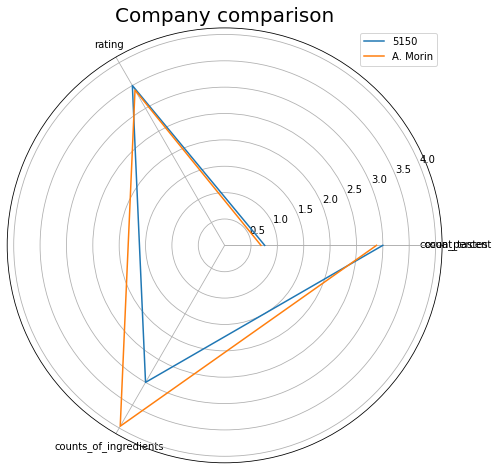

In [117]:
#categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambiance', 'Affordability']


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(feat_radar))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, company1_list, label=company1)
plt.plot(label_loc, company2_list, label=company2)
plt.title('Company comparison', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=feat_radar)
plt.legend()
plt.show()

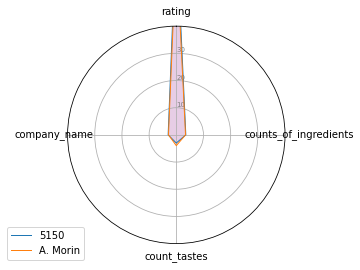

In [132]:
# number of variable
categories=list(radar)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# labels = [
#     range(0,101), range(0,6), range(0,11), 
#    range(0,5)]

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=radar.iloc[0].drop('company_name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=company1)
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar.iloc[1].drop('company_name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=company2)
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [121]:
radar.iloc[0]

cocoa_percent            0.76
rating                    3.5
counts_of_ingredients     3.0
count_tastes              3.0
company_name             5150
Name: 5150, dtype: object

### Parallel Coordinates Plot


In [66]:
company1 = 'Ah Cacao'
company2 = 'Zotter'


In [67]:
data.company

0           5150
1           5150
2           5150
3       A. Morin
4       A. Morin
          ...   
2207      Zotter
2208      Zotter
2210      Zotter
2211      Zotter
2212      Zotter
Name: company, Length: 2074, dtype: object

In [76]:
parallel_coord = test_taste[test_taste['company'].isin([company1,company2])]

In [77]:
filter_company = lambda x: 1 if x == company1 else 2

In [78]:
parallel_coord['company_number'] = parallel_coord['company'].apply(filter_company)

In [79]:
parallel_coord.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,...,country_y,bean_continent,bean_region,bean_code_2,binFirst_taste,binSecond_taste,binThird_taste,binFourth_taste,count_tastes,company_number
42,316,Ah Cacao,Mexico,2009,Mexico,Tabasco,70.0,3.00,3,have_bean,...,Mexico,Americas,Central America,MX,1,1,1,0,3,1
2193,486,Zotter,Austria,2010,Brazil,"Brazil, Mitzi Blue",65.0,3.00,4,have_bean,...,Brazil,Americas,South America,BR,1,1,0,0,2,2
2194,647,Zotter,Austria,2011,Peru,Peru,70.0,3.75,4,have_bean,...,Peru,Americas,South America,PE,1,1,1,0,3,2
2195,749,Zotter,Austria,2011,India,Kerala State,65.0,3.50,4,have_bean,...,India,Asia,Southern Asia,IN,1,1,1,0,3,2
2196,781,Zotter,Austria,2011,India,Kerala State,62.0,3.25,4,have_bean,...,India,Asia,Southern Asia,IN,1,1,1,1,4,2


In [80]:
fig = px.parallel_coordinates(parallel_coord,
                              dimensions = feat_radar,
                              color= parallel_coord['company_number'],
                              range_color=[0.5, 3.5],
                              color_continuous_scale=[(0.00, '#AB63FA'),   (0.5,'#AB63FA'),
                                                     (0.5, '#FFA15A'), (1, '#FFA15A')],
                              labels={"cocoa_percent": "Percentage of Cocoa (%)", 
                                      "rating": "Rating",
                                      "counts_of_ingredients": "Number of Ingredients", 
                                      "count_tastes": "Number of Tastes"},
                             color_continuous_midpoint=2,
                             title = f"Comparison between {company1} and {company2}"
                             )
fig.update_layout(
    coloraxis_colorbar=dict(
    title="Company",
    tickvals=[1,2],
    ticktext=[company1,company2],
    lenmode="pixels", len=100
))
fig.show()


### Scatter Plot

In [90]:
scatter = px.scatter(parallel_coord, x="count_tastes", y="counts_of_ingredients", color="cocoa_percent", 
                 symbol = 'company_number', size='rating', hover_data=['company'])

scatter.show()

In [91]:
scatter2 = px.scatter(parallel_coord, x="count_tastes", y="counts_of_ingredients", color="cocoa_percent", 
                 facet_col = 'company_number', size='rating', hover_data=['company'])

scatter2.show()

In [95]:
scatter3 = px.scatter(parallel_coord, x="rating", y="cocoa_percent", color="counts_of_ingredients", 
                 symbol = 'company_number', size='count_tastes', hover_data=['company'])


scatter.update_layout(
    coloraxis_colorbar=dict(
    title="Count of ingredients",
    lenmode="pixels", len=100
))

scatter3.show()